## Preprocessing

In [1]:
!pip install keras_tuner
!pip install tensorflow

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras_tuner
import tensorflow as tf
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [3]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Check Dataset for Nulls & Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:

# Get Columns
columns = df.columns
columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [6]:
# Define the target variable
target = 'IS_SUCCESSFUL'

# Define features - not using EIN or NAME
features =['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'INCOME_AMT',
       'ASK_AMT', 'IS_SUCCESSFUL']

In [7]:
# Copy DataFrame
df1 = df.copy()

In [8]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
dropped_cols = ['EIN', 'NAME']
df1.drop(columns=dropped_cols, inplace=True)
df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Determine the number of unique values in each column.
# chat gbt

for column in df.columns[5:]:
    print(f"'{column}' UNIQUE VALUES & COUNTS:")
    print(df1[column].value_counts())
    print("\n")

'USE_CASE' UNIQUE VALUES & COUNTS:
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64


'ORGANIZATION' UNIQUE VALUES & COUNTS:
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64


'STATUS' UNIQUE VALUES & COUNTS:
STATUS
1    34294
0        5
Name: count, dtype: int64


'INCOME_AMT' UNIQUE VALUES & COUNTS:
INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64


'SPECIAL_CONSIDERATIONS' UNIQUE VALUES & COUNTS:
SPECIAL_CONSIDERATIONS
N    34272
Y       27
Name: count, dtype: int64


'ASK_AMT' UNIQUE VALUES & COUNTS:
ASK_AMT
5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  


In [10]:
# APPLICATION TYPES UNDER 500
app_counts = df1.APPLICATION_TYPE.value_counts()

print(app_counts)
print(app_counts.sum())

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64
34299


In [11]:
# NUMBER OFAPPLICATION TYPES UNDER 500
app_others = app_counts.loc[app_counts < 500]

print(app_others)
app_others.sum()

APPLICATION_TYPE
T9     156
T13     66
T12     27
T2      16
T25      3
T14      3
T29      2
T15      2
T17      1
Name: count, dtype: int64


276

In [12]:
# APPLICATION_TYPES VALUE COUNTS UNDER 500
# REPLACE WITH 'OTHER'
app_min_count = 500
app_others = app_counts.loc[app_counts < app_min_count].index.tolist()

# REPLACE IN DATAFRAME
for app in app_others:
    df1.APPLICATION_TYPE = df1.APPLICATION_TYPE.replace(app,"OTHER")

# VERIFY REPLACEMENT
df1.APPLICATION_TYPE.value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
OTHER      276
Name: count, dtype: int64

In [13]:
# CLASSIFICATIONS VALUE COUNTS FOR GROUPING
class_counts = df1.CLASSIFICATION.value_counts()

print(class_counts.sum())
class_counts

34299


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [14]:
# LOOK AT CLASSIFICATION VALUE COUNTS > 1
class_counts.loc[class_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [15]:
# CLASSIFICATIONS VALUE COUNTS UNDER 500
# REPLACEWITH 'OTHER'
min_class = 500
class_others = class_counts.loc[class_counts < min_class].index.tolist()

# Replace in dataframe
for cls in class_others:
    df1.CLASSIFICATION = df1.CLASSIFICATION.replace(cls,"OTHER")

# Check to make sure replacement was successful
print(df1.CLASSIFICATION.value_counts().sum())
df1.CLASSIFICATION.value_counts()

34299


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
OTHER     1484
C7000      777
Name: count, dtype: int64

In [16]:
# COPY DATAFRAME
df3 = df1.copy()

In [17]:
# Separate numeric and categorical data
num_data = df3.select_dtypes(include=['int64'])
cat_data = df3.select_dtypes(include=['object'])

print(cat_data.columns)
print(num_data.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')
Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL'], dtype='object')


In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(cat_data)

# Combine dummies with DataFrame
combined_df = pd.concat([num_data, dummies], axis=1)

# Display the combined DataFrame
combined_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [19]:
# Check datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_OTHER        34299 non-null  bool 
 4   APPLICATION_TYPE_T10          34299 non-null  bool 
 5   APPLICATION_TYPE_T19          34299 non-null  bool 
 6   APPLICATION_TYPE_T3           34299 non-null  bool 
 7   APPLICATION_TYPE_T4           34299 non-null  bool 
 8   APPLICATION_TYPE_T5           34299 non-null  bool 
 9   APPLICATION_TYPE_T6           34299 non-null  bool 
 10  APPLICATION_TYPE_T7           34299 non-null  bool 
 11  APPLICATION_TYPE_T8           34299 non-null  bool 
 12  AFFILIATION_CompanySponsored  34299 non-null  bool 
 13  AFFILIATION_Family/Parent     3

In [20]:
# CHECK RANGE OF NUMERIC DATA FOR SCALING
combined_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [21]:
# TARGET AND FEATURES
label = 'IS_SUCCESSFUL'

# DROP TARGET COLUMN
col_data = combined_df.drop(columns=label)

# FEATURES ARRAY
features = col_data.loc[:].values

# Extract target as an array
target = combined_df[label].values
col_data

,STATUS,ASK_AMT,APPLICATION_TYPE_OTHER,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
# Split our preprocessed data into our features and target arrays
y = combined_df.IS_SUCCESSFUL
X = features

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 44) (8575, 44)


In [23]:
  # Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn_model_A = tf.keras.models.Sequential()

# First hidden layer
nn_model_A.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=num_features))

# Output layer
nn_model_A.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_A.summary()

/Users/redhawkwax/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,601 (17.97 KB)

 Trainable params: 4,601 (17.97 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import keras
# chat gbt code
# Custom callback to save every 5 epochs
class SaveEveryNEpochs(keras.callbacks.Callback):
    def __init__(self, save_freq, save_path):
        super(SaveEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.save_path = save_path
    
    def on_epoch_end(self, epoch, logs=None):
        # Save the model weights every 5 epochs
        if (epoch + 1) % self.save_freq == 0:
            self.model.save_weights(self.save_path)
            print(f"\nSaving model weights at epoch {epoch + 1}")

# Compile the model
nn_model_A.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the file path to save the model's weights
filepath = '/tmp/ckpt/checkpoint.weights.h5'

# Instantiate the custom callback to save every 5 epochs
save_callback = SaveEveryNEpochs(save_freq=5, save_path=filepath)

# Train the model and use the custom callback
fit_model = nn_model_A.fit(X_train_scaled, y_train, epochs=80, callbacks=[save_callback])

# Load the model's weights after training if needed
nn_model_A.load_weights(filepath)

Epoch 1/80


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.6989 - loss: 0.5977
Epoch 2/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.7279 - loss: 0.5585
Epoch 3/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.7245 - loss: 0.5565
Epoch 4/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.7361 - loss: 0.5460
Epoch 5/80
734/804 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.7321 - loss: 0.5503
Saving model weights at epoch 5
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7318 - loss: 0.5504
Epoch 6/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.7345 - loss: 0.5495
Epoch 7/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7378 - loss: 0.5419
Epoch 8/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7288 - loss: 0.5507
Epoch 9/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7309 - loss: 0.5481
Epoch 10/80
754/804 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.7273 - loss: 0.5495
Saving model weights 

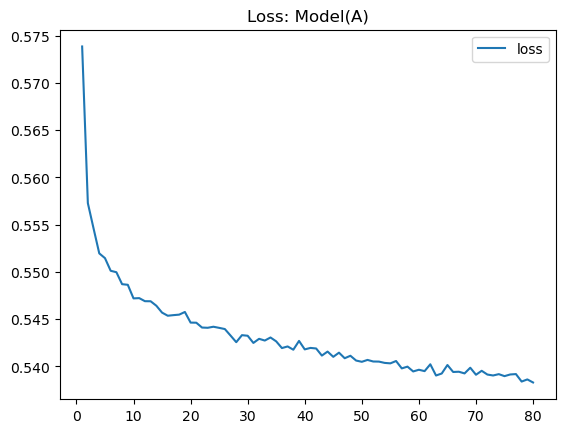

<Figure size 640x480 with 0 Axes>

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss", title="Loss: Model(A)")
plt.show()
plt.savefig('model_A_loss.png')

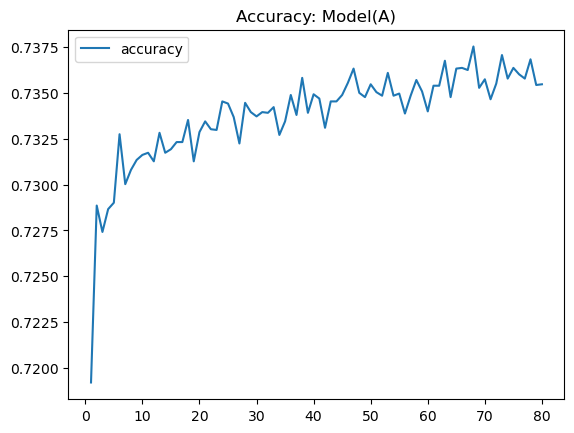

<Figure size 640x480 with 0 Axes>

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy", title="Accuracy: Model(A)")
plt.show()
plt.savefig('model_A_accuracy.png')

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_A.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 457us/step - accuracy: 0.7262 - loss: 0.5573
Loss: 0.5572723746299744, Accuracy: 0.7261807322502136


In [29]:
# Export our model to HDF5 file
nn_model_A.save("AlphabetSoupCharity.h5")